<a href="https://colab.research.google.com/github/JSchoonmaker/Research/blob/main/sandy_week_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
root_path = 'gdrive/My Drive/SIA_Data_Science/Twitter Scraper Data/sandy_one_year.csv'

In [3]:
import pandas as pd
import numpy as np
import re

In [35]:
df = pd.read_csv(root_path)
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (22) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,285535700277919744,285535700277919744,2012-12-30 18:59:50 EST,2012-12-30,18:59:50,-500,820741129,rosieemordi,Rosemary Emordi,NaN,"Looked on a magazine and said ""awe these littl...",en,[],[],[],0,0,0,['sad'],[],https://twitter.com/RosieEmordi/status/2855357...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,285535644325916673,285535644325916673,2012-12-30 18:59:37 EST,2012-12-30,18:59:37,-500,331809661,ellenbarr1,Ellen Barr,NaN,The headlines move on but it's only been a few...,en,[],['http://www.dailymail.co.uk/news/article-2254...,[],0,0,1,['sandyhook'],[],https://twitter.com/EllenBarr1/status/28553564...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,285535639317905408,285535639317905408,2012-12-30 18:59:36 EST,2012-12-30,18:59:36,-500,80220290,dirty_diana29,D!@Π@™,NaN,PTA in Connecticut is collecting snowflakes f...,en,[],['http://instagr.am/p/T4TlZEjjYR/'],[],0,0,0,[],[],https://twitter.com/dirty_diana29/status/28553...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,285535540563030018,285535540563030018,2012-12-30 18:59:12 EST,2012-12-30,18:59:12,-500,43477325,ecobard,Grumpy Old Antifa,NaN,Will climate change ever have its Sandy Hook m...,en,"[{'screen_name': 'conversationedu', 'name': 't...",['http://theconversation.edu.au/will-climate-c...,[],0,0,0,[],[],https://twitter.com/ecobard/status/28553554056...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,285535505096003584,285535505096003584,2012-12-30 18:59:04 EST,2012-12-30,18:59:04,-500,35017099,paulbarer,Norm Feeney,NaN,@kathleenmadigan If the photos of the dead chi...,en,[],[],[],0,0,0,[],[],https://twitter.com/PaulBarer/status/285535505...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [5]:
df.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [6]:
df.count()

id                 472291
conversation_id    472291
created_at         472291
date               472291
time               472291
timezone           472291
user_id            472291
username           472291
name               472205
place                6389
tweet              472291
language           472291
mentions           472291
urls               472291
photos             472291
replies_count      472291
retweets_count     472291
likes_count        472291
hashtags           472291
cashtags           472291
link               472291
retweet            472291
quote_url              68
video              472291
thumbnail           10688
near                    0
geo                     0
source                  0
user_rt_id              0
user_rt                 0
retweet_id              0
reply_to           472291
retweet_date            0
translate               0
trans_src               0
trans_dest              0
dtype: int64

In [7]:
df.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [8]:
df1 = df[['id', 
         'created_at', 
         'date', 
         'time', 
         'user_id', 
         'username', 
         'name', 
         'tweet',     
         'likes_count', 
         'hashtags', 
         'retweet']]
df1.head()

,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
0,285535700277919744,2012-12-30 18:59:50 EST,2012-12-30,18:59:50,820741129,rosieemordi,Rosemary Emordi,"Looked on a magazine and said ""awe these littl...",0,['sad'],False
1,285535644325916673,2012-12-30 18:59:37 EST,2012-12-30,18:59:37,331809661,ellenbarr1,Ellen Barr,The headlines move on but it's only been a few...,1,['sandyhook'],False
2,285535639317905408,2012-12-30 18:59:36 EST,2012-12-30,18:59:36,80220290,dirty_diana29,D!@Π@™,PTA in Connecticut is collecting snowflakes f...,0,[],False
3,285535540563030018,2012-12-30 18:59:12 EST,2012-12-30,18:59:12,43477325,ecobard,Grumpy Old Antifa,Will climate change ever have its Sandy Hook m...,0,[],False
4,285535505096003584,2012-12-30 18:59:04 EST,2012-12-30,18:59:04,35017099,paulbarer,Norm Feeney,@kathleenmadigan If the photos of the dead chi...,0,[],False


In [39]:
day_one = df1[(df1.date == '2012-12-12')]
day_one.head()

,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
471832,279078368480215040,2012-12-12 23:20:42 EST,2012-12-12,23:20:42,88301622,justolderjovi,Lauri,@blas69 I knew Shore &amp; Staten Island..(my ...,0,[],False
471833,279076297551011841,2012-12-12 23:12:28 EST,2012-12-12,23:12:28,26539082,___alexandrae,alex bradley,"Sandy Hook, Sea Bright, Asbury Park... Loving ...",0,"['jerseystrong', '121212concert']",False
471834,279075772352847872,2012-12-12 23:10:23 EST,2012-12-12,23:10:23,36214864,radiusalna,tasnim khan,"@DrOz banjovi from your sandy hook, also A ...",0,[],False
471835,279075706917494784,2012-12-12 23:10:08 EST,2012-12-12,23:10:08,520917926,merrywy1,Merry Segalla,Sales WGH20226 Sandy Hook Lighthouse Light Vin...,0,['sales'],False
471836,279074894828949505,2012-12-12 23:06:54 EST,2012-12-12,23:06:54,379849616,cammigail,Cammi :),#ScarStories I have many from my childhood day...,0,['scarstories'],False


In [10]:
day_one.shape

(35, 11)

In [11]:
day_one = day_one.to_csv("day_one_SH.csv", header=True)

In [12]:
day_one_path = '/content/day_one_SH.csv'

In [40]:
day_one_df = pd.read_csv(day_one_path)
day_one_df.head()

,Unnamed: 0,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
0,471832,279078368480215040,2012-12-12 23:20:42 EST,2012-12-12,23:20:42,88301622,justolderjovi,Lauri,@blas69 I knew Shore &amp; Staten Island..(my ...,0,[],False
1,471833,279076297551011841,2012-12-12 23:12:28 EST,2012-12-12,23:12:28,26539082,___alexandrae,alex bradley,"Sandy Hook, Sea Bright, Asbury Park... Loving ...",0,"['jerseystrong', '121212concert']",False
2,471834,279075772352847872,2012-12-12 23:10:23 EST,2012-12-12,23:10:23,36214864,radiusalna,tasnim khan,"@DrOz banjovi from your sandy hook, also A ...",0,[],False
3,471835,279075706917494784,2012-12-12 23:10:08 EST,2012-12-12,23:10:08,520917926,merrywy1,Merry Segalla,Sales WGH20226 Sandy Hook Lighthouse Light Vin...,0,['sales'],False
4,471836,279074894828949505,2012-12-12 23:06:54 EST,2012-12-12,23:06:54,379849616,cammigail,Cammi :),#ScarStories I have many from my childhood day...,0,['scarstories'],False


In [14]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [26]:
def word_cloud_builder(tweets):
  from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
  from PIL import Image
  import matplotlib.pyplot as plt

  tweet_words = []
  for each in tweets:
    tweet_words.append(word_tokenize(each))

  wordfreq = [tweet_words.count(w) for w in tweet_words]

  text = " ".join(tweet_words[1])
  wordcloud = WordCloud().generate(text)
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()

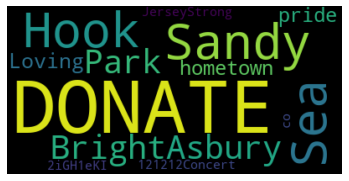

In [27]:
word_cloud_builder(day_one_df.tweet)

In [42]:
day_two = df1[(df1.date == '2012-12-13')]
print(day_two.shape)
day_two.head()

(29, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
471803,279444110677524481,2012-12-13 23:34:02 EST,2012-12-13,23:34:02,520917926,merrywy1,Merry Segalla,Sales WGH20226 Sandy Hook Lighthouse Light Vin...,0,['sales'],False
471804,279407442654285824,2012-12-13 21:08:20 EST,2012-12-13,21:08:20,520917926,merrywy1,Merry Segalla,Sales WGH20226 Sandy Hook Lighthouse Light Vin...,0,['sales'],False
471805,279390531786768385,2012-12-13 20:01:08 EST,2012-12-13,20:01:08,63250876,krazycamera,Karan Kauchhur,"Sandy Hook Beach, NJ #jerseyshores #jersey #nj...",0,"['jerseyshores', 'jersey', 'nj', 'beach', 'sun...",False
471806,279390289930641408,2012-12-13 20:00:10 EST,2012-12-13,20:00:10,63250876,krazycamera,Karan Kauchhur,"Sandy Hook Beach, NJ #jerseyshores #jersey #nj...",0,"['jerseyshores', 'jersey', 'nj', 'beach', 'sun...",False
471807,279390145453641728,2012-12-13 19:59:36 EST,2012-12-13,19:59:36,402155602,roamingkatina,Katina,Sandy Hook and Gateway Recreation Area Faces L...,0,[],False


Interesting note - many unrelated tweets that are selling houses or listing real estate use the "sales" hashtag or "real estate" hashtag - so filtering those hashtags out might be a good way of reducing noise in the dataset

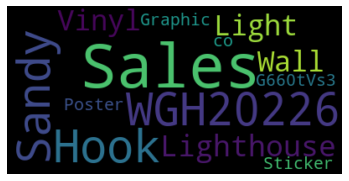

In [28]:
word_cloud_builder(day_two.tweet)

In [43]:
day_three = df1[(df1.date == '2012-12-14')]
print(day_three.shape)
day_three.head()

(90094, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
381709,279813021231112192,2012-12-14 23:59:57 EST,2012-12-14,23:59:57,375280915,thenewsburner,TheNewsBurner,27 Dead 18 Children In Connecticut School Shoo...,0,"['prayfornewtown', 'shooting', 'connecticut', ...",False
381710,279813014767673344,2012-12-14 23:59:56 EST,2012-12-14,23:59:56,62720740,flowersfor5,Flowers,"While painful, the twitter of @DHochsprung (pr...",1,[],False
381711,279813001752752128,2012-12-14 23:59:52 EST,2012-12-14,23:59:52,97563734,breakingnyc,New York City News,Sandy Hook Forces Re-examination of Tough Ques...,0,[],False
381712,279813001220083713,2012-12-14 23:59:52 EST,2012-12-14,23:59:52,115323498,cirillusgilang,cyrillus.sasongko,Adam Lanza si Pelaku Penembakan Brutal SD Sand...,0,[],False
381713,279813000561582080,2012-12-14 23:59:52 EST,2012-12-14,23:59:52,91036719,missajie,Virgin Juliana,So heartbreaking to hear such news from Sandy ...,0,[],False


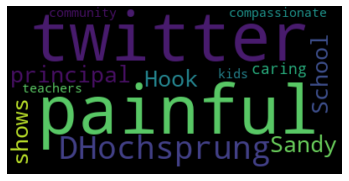

In [30]:
word_cloud_builder(day_three.tweet)

In [44]:
day_four = df1[(df1.date == '2012-12-15')]
print(day_four.shape)
day_four.head()

(49249, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
332460,280175395691712513,2012-12-15 23:59:54 EST,2012-12-15,23:59:54,24323681,bigquizthing,The Big Quiz Thing,http://t.co/xrQQVMe7: Shooting at Sandy Hook ...,0,[],False
332461,280175391002468352,2012-12-15 23:59:53 EST,2012-12-15,23:59:53,192996553,ferretmorgue,John Ferriter,"Sandy Hook, Hurricane Sandy - we need some rel...",0,[],False
332462,280175390893416448,2012-12-15 23:59:53 EST,2012-12-15,23:59:53,726338197,_sunshineshan,Shannon 🌻✨,The impact of the Sandy Hook Elementary shooti...,0,[],False
332463,280175380588007424,2012-12-15 23:59:51 EST,2012-12-15,23:59:51,381165737,missingcases,Locate The Missing,#RIP Sandy Hook Elementary School Children #Ne...,3,"['rip', 'newtownmassacre']",False
332464,280175365991854080,2012-12-15 23:59:47 EST,2012-12-15,23:59:47,570977781,alisha_ann71,Sheesh ☀️,Allison N Wyatt 6 Years Old. #SandyHook #R.I.P.,0,"['sandyhook', 'r']",False


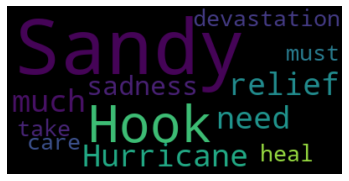

In [32]:
word_cloud_builder(day_four.tweet)

In [45]:
day_five = df1[(df1.date == '2012-12-16')]
print(day_five.shape)
day_five.head()

(55516, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
276944,280537804759523328,2012-12-16 23:59:59 EST,2012-12-16,23:59:59,226351602,710keel,KEEL News,Connecticut police have released new details o...,0,[],False
276945,280537787621588992,2012-12-16 23:59:55 EST,2012-12-16,23:59:55,123129064,elbertnunez,Elbert Nunez,1:58 in the movie the dark knight rises you se...,0,[],False
276946,280537779656609793,2012-12-16 23:59:53 EST,2012-12-16,23:59:53,246528525,politicolonel,Politi Colonel,Anonymous Hacks Westboro Baptist Church after ...,0,[],False
276947,280537778746425345,2012-12-16 23:59:53 EST,2012-12-16,23:59:53,937866180,thedeous,Thedeous Lewis-Johns,SIGN the Sandy Hook Elementary School National...,0,[],False
276948,280537741966581761,2012-12-16 23:59:44 EST,2012-12-16,23:59:44,556136260,vietfromvietnam,Viet Tran,Holy shit some people are just batshit insane ...,0,[],False


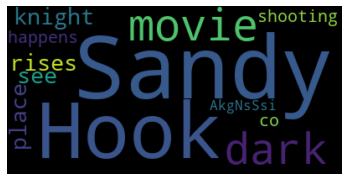

In [34]:
word_cloud_builder(day_five.tweet)

In [46]:
day_six = df1[(df1.date == '2012-12-17')]
print(day_six.shape)
day_six.head()

(65816, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
211128,280900174006595584,2012-12-17 23:59:55 EST,2012-12-17,23:59:55,166259681,examinecharlott,Examine Charlotte,Singers on ‘The Voice’ perform ‘Hallelujah’ fo...,0,[],False
211129,280900173373259776,2012-12-17 23:59:54 EST,2012-12-17,23:59:54,27587647,mflorcruz,Michelle FlorCruz,My mental-health follow up to last Friday's sc...,0,"['china', 'sandyhook']",False
211130,280900162224787457,2012-12-17 23:59:52 EST,2012-12-17,23:59:52,545623823,joe_strong92,joseph strong,reading the news reports about sandy hook is q...,0,['cantcomprehend'],False
211131,280900158449934337,2012-12-17 23:59:51 EST,2012-12-17,23:59:51,63205281,locheikh,Sheikh Ahmadou Bamba,While witnessing a mass massacre as the one to...,0,[],False
211132,280900158013714433,2012-12-17 23:59:51 EST,2012-12-17,23:59:51,291406473,bgp516,Marilyn,President Obama Speaks On The Sandy Hook Shoot...,0,[],False


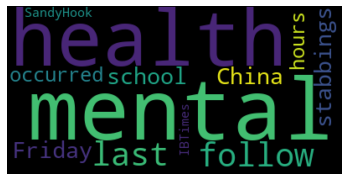

In [47]:
word_cloud_builder(day_six.tweet)

In [48]:
day_seven = df1[(df1.date == '2012-12-18')]
print(day_seven.shape)
day_seven.head()

(45221, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
165907,281262557443018754,2012-12-18 23:59:53 EST,2012-12-18,23:59:53,167545944,heyitsmelis,#MN,@OneRepublic: Help the families &amp; communit...,0,[],False
165908,281262553378742272,2012-12-18 23:59:52 EST,2012-12-18,23:59:52,16442451,anomalyradio,AnomalyRadio,"12/18/12 Will Grigg: Will Grigg, blogger and a...",0,[],False
165909,281262526342262784,2012-12-18 23:59:46 EST,2012-12-18,23:59:46,104960198,kriscollins_,Kristen Collins,2 more sweet angels were laid to rest today #R...,0,"['ripjessica', 'ripjames', 'gonetoosoon', 'nev...",False
165910,281262524614197248,2012-12-18 23:59:46 EST,2012-12-18,23:59:46,934947804,e4liberty2,Evangelicals4Liberty,Team Obama still raising money--off Sandy Hook...,0,[],False
165911,281262520868687872,2012-12-18 23:59:45 EST,2012-12-18,23:59:45,494517114,speed4pahouse,Sarah Speed,About 200 attend York City vigil for Sandy Hoo...,0,[],False


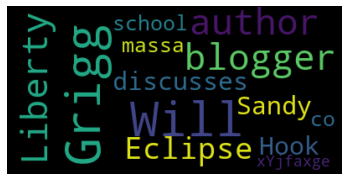

In [49]:
word_cloud_builder(day_seven.tweet)

In [50]:
day_eight = df1[(df1.date == '2012-12-19')]
print(day_eight.shape)
day_eight.head()

(38334, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
127573,281624960768823298,2012-12-19 23:59:57 EST,2012-12-19,23:59:57,10276742,agradoce,Rebecca Agra,A nice way to get kids involved who want to do...,0,['dt'],False
127574,281624958420000769,2012-12-19 23:59:57 EST,2012-12-19,23:59:57,15953961,ghostexecutive,Michele Lorito-Chase,A nice way to get kids involved who want to do...,0,['dt'],False
127575,281624955785973760,2012-12-19 23:59:56 EST,2012-12-19,23:59:56,132662336,mirella_2010,Negoita Mirela,A nice way to get kids involved who want to do...,0,['dt'],False
127576,281624954183745538,2012-12-19 23:59:56 EST,2012-12-19,23:59:56,127112233,purpleleaves13,Janine Anne Rose,A nice way to get kids involved who want to do...,0,['dt'],False
127577,281624952665411586,2012-12-19 23:59:55 EST,2012-12-19,23:59:55,72194094,tuanminator,em 🐰 #GOT7FOREVER,A nice way to get kids involved who want to do...,0,['dt'],False


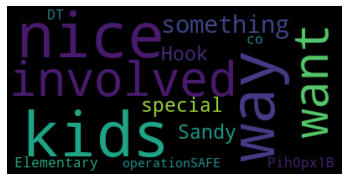

In [52]:
word_cloud_builder(day_eight.tweet)

In [53]:
day_nine = df1[(df1.date == '2012-12-20')]
print(day_nine.shape)
day_nine.head()

(31667, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
95906,281987343345410048,2012-12-20 23:59:56 EST,2012-12-20,23:59:56,19095170,nightowlmama,Night Owl Mama,Would you like to do something for the childre...,0,[],False
95907,281987292707565568,2012-12-20 23:59:44 EST,2012-12-20,23:59:44,461439010,travyjeremus,TJ Sexton,There Will Be An 'Internet Moment Of Silence' ...,0,['momentforsandyhook'],False
95908,281987287162687488,2012-12-20 23:59:42 EST,2012-12-20,23:59:42,355376283,fhsinflight,FHS InFlight News,"I posted 10 photos on Facebook in the album ""B...",0,[],False
95909,281987280841867265,2012-12-20 23:59:41 EST,2012-12-20,23:59:41,42746613,bookcrossingfan,BXer solittletime,You won't believe Mike Huckabee's wild reason ...,0,[],False
95910,281987280204333056,2012-12-20 23:59:41 EST,2012-12-20,23:59:41,220187399,vi_xii,"JB - (Gab, PolitiChatter, MeWe)",Sandy Hook victim Emilie Parker: before and af...,0,[],False


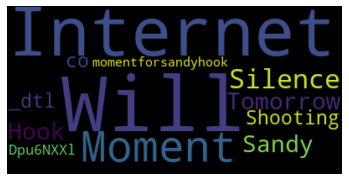

In [54]:
word_cloud_builder(day_nine.tweet)

In [55]:
day_ten = df1[(df1.date == '2012-12-21')]
print(day_ten.shape)
day_ten.head()

(32693, 11)


,id,created_at,date,time,user_id,username,name,tweet,likes_count,hashtags,retweet
63213,282349733555625985,2012-12-21 23:59:56 EST,2012-12-21,23:59:56,58409274,argondaitaiwan,Argon Dai,Top story: Gun-death tally: Every American gun...,0,[],False
63214,282349720834293760,2012-12-21 23:59:53 EST,2012-12-21,23:59:53,286986471,itsjailedminori,Minori Kushieda,@GCauf None of the recent shooters of Gabby Gi...,0,[],False
63215,282349702203183104,2012-12-21 23:59:49 EST,2012-12-21,23:59:49,562590528,hot_tamolly_57,☼Molly☼,Hey our a school didn't have the nation wide m...,0,[],False
63216,282349687086936065,2012-12-21 23:59:45 EST,2012-12-21,23:59:45,514466854,ktlittleton2,katie littleton,Never Forget Sandy Hook Elementry schools. Alw...,0,['newton'],False
63217,282349656082636801,2012-12-21 23:59:38 EST,2012-12-21,23:59:38,326316406,24hrshealthnews,Health News Today,#Health #News Asperger's parents anxious follo...,0,"['health', 'news']",False


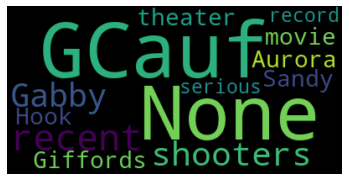

In [56]:
word_cloud_builder(day_ten.tweet)